Причастные к созданию;

Шкобин   Ю.Г. (M01-902)

Черноног В.В. (M01-906)

Трусов   А.В  (M01-901)

# Не самая насыщенная графиками работа :(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

csfont = {'fontname':'Helvetica'}
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16,9]


# Задача №1

Дано

$x(k)$ - вещественный сигнал с полосой $2f_в = 10кГц$

N = 1000

$X(n) = \sum\limits_{k= 0}^{N-1}x(k)e^{-j\dfrac{2\pi}{N}nk}$

$X(\nu) = \sum\limits_{k= 0}^{N-1}x(k)e^{-j2\pi\nu k}$

$n = \overline{0,N-1}$

$X(900) = 1B$

$X(420) = 5B$

Найти

$X(\nu) - ?$



Тк сигнал дискретизуется, то в соответствии с теорией отсчетов
$\Delta t = \dfrac{1}{2f_B}$

$X(n) = \sum\limits_{k= 0}^{N-1}x(k)e^{-j\dfrac{2\pi}{N}nk}
\leftrightarrow
x(k) = \dfrac{1}{N}\sum\limits_{n= 0}^{N-1}X(n)e^{j\dfrac{2\pi}{N}n k}$

$X(\nu) = \sum\limits_{k= 0}^{N-1}x(k)e^{-j2\pi\nu k}
\leftrightarrow
x(k) = \int_{-\dfrac{1}{2}}^{\dfrac{1}{2}}X(\nu)e^{j2\pi\nu k}d\nu $


Известно, что $X(\nu)$ - периодична с периодом $T = 1$, по этому рассмотрим только полуинтервал $[0;1)$

Определим связь между $X(\nu) и X(n); считая, что рассматривается N точечная последовательность x(k)$

$X(\nu) = \sum\limits_{k= 0}^{N-1}\left[ \dfrac{1}{N}\sum\limits_{n= 0}^{N-1}X(n)e^{j\dfrac{2\pi}{N}nk}\right]e^{-j2\pi\nu k} 
= \dfrac{1}{N}\sum\limits_{n= 0}^{N-1}X(n)\sum\limits_{k= 0}^{N-1}e^{-j\dfrac{2\pi}{N}k\left(N\nu - n \right)}$


Видим геометрическую прогрессию с $b_1 = 1 , q = e^{-j\dfrac{2\pi}{N}k\left(N\nu - n \right)}$

$\sum\limits_{k= 0}^{N-1}e^{-j\dfrac{2\pi}{N}k\left(N\nu - n \right)} = \dfrac{1-e^{-j2\pi k\left(N\nu - n \right)}}{1-e^{-j\dfrac{2\pi}{N}k\left(N\nu - n \right)}}
=e^{-j\pi\left(\nu - \dfrac{n}{N}\right)\left( N-1\right)} \dfrac{\sin(\pi N\left(\nu - \dfrac{n}{N}\right))}{\sin(\pi \left(\nu - \dfrac{n}{N}\right))}
$

$X(\nu) = \dfrac{1}{N}\sum\limits_{n= 0}^{N-1}e^{-j\pi\left(\nu - \dfrac{n}{N}\right)\left( N-1\right)} \dfrac{\sin(\pi N\left(\nu - \dfrac{n}{N}\right))}{\sin(\pi \left(\nu - \dfrac{n}{N}\right))} $

Однако при $\nu = \dfrac{k}{N}$

$\dfrac{\sin(\pi N\left(\nu - \dfrac{n}{N}\right))}{\sin(\pi \left(\nu - \dfrac{n}{N}\right))} = N \mathbb{1}(n-k) $

Тогда 

$X(\nu) = X(k)$


Так как сигнал x(t) - вещественный, то 

$X(n) = X^*(N-n)$

В итоге получаем

$X(100) = 1B =  X(\nu = 0.1)= X(f=1кГц)$

$X(420) = 1B =  X(\nu = 0.42)= X(f=4,2кГц)$

$X(580) = 1B =  X(\nu = 0.58)= X(f=5,8кГц)$

$X(900) = 1B =  X(\nu = 0.9)= X(f=9кГц)$



# Задача № 2


\begin{equation*}
x(k) = 
 \begin{cases}
   \cos(\dfrac{2\pi}{N}rk) &  k = \overline{0,N-1}  \\
   0 &  else 
 \end{cases}
\end{equation*}

r = 5

N = 16

Найти 
$X(n) - ?$

$|X(n)| = ?$

Решение  

$X(N) =  \dfrac{1}{N}\sum\limits_{k= 0}^{N-1}x(k)e^{-j\dfrac{2\pi}{N}rk}$


$\cos(\dfrac{2\pi}{N}rk) = \dfrac{1}{2}\left(e^{j\dfrac{2\pi}{N}rk} + e^{-j\dfrac{2\pi}{N}rk}\right)$

Получим сумму двух геом. прогрессий, посчитаем их отдельно

$\sum\limits_{k= 0}^{N-1}e^{-j\dfrac{2\pi}{N}k\left(n \pm r \right)} =
e^{-j\pi\left(n \pm r\right)\left( 1-\dfrac{1}{N}\right)} \dfrac{\sin(\pi \left(n \pm  r\right))}{\sin(\pi \left(n \pm r\right))}
$

$|X(n)| = \dfrac{1}{2N}\left[ e^{-j\pi\left(n + r\right)\left( 1-\dfrac{1}{N}\right)} \dfrac{\sin(\pi \left(n +  r\right))}{\sin(\pi \left(n + r\right))} + e^{-j\pi\left(n - r\right)\left( 1-\dfrac{1}{N}\right)} \dfrac{\sin(\pi \left(n -  r\right))}{\sin(\pi \left(n - r\right))} \right] $

$|X(n)| = \dfrac{1}{2N} \sqrt{\dfrac{\sin^2(\pi(n-r))}{\sin^2(\dfrac{\pi}{N}(n-r))}  + \dfrac{\sin^2(\pi(n+r))}{\sin^2(\dfrac{\pi}{N}(n+r))} + 2\cos(2\pi r\dfrac{N-1}{N})\dfrac{\cos(2\pi r) - \cos(2\pi n)}{\cos(\dfrac{2\pi r}{N})  - \cos(\dfrac{2 \pi n}{N})}}$

Заметим, что для $\forall n$ $\sin$ в числителе = 0, а в знаменателе только при  n = 5 и при n =11

Значит 
X(n) = 0, ghb n = 0;1;2;3;4;6;7;8;9;10;12;13;14;15

Вычислим

$X(5) = \dfrac{1}{2}$

т.к x(k) - действ последовательность, то 

$X(n) = X^*(N-n)$

то есть 

$X(11) = X^*(16-11) =X^*(5) = \dfrac{1}{2} $

$В итоге $

$X(n) = \dfrac{1}{2} при n =5;11$

Т.к Отсчеты X(n) получились действительными и неотрицательными, то они совпадают с $|X(n)|$

Изобразим $|X(n)|$

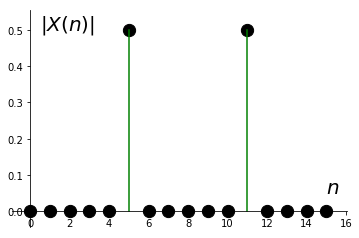

In [2]:
ax = plt.axes()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate('$n$', xy=(15,0.05),size=20)
plt.annotate('$|X(n)|$', xy=(0.5,0.5),size=20)
plt.scatter([5],[1/2],s=150,color='black')
plt.scatter([11],[1/2],s=150,color='black')
for i in range(0,16):
    if (i != 5 and i !=11):
        plt.scatter([i],[0],s=150,color='black')
plt.plot([5,5],[0,1/2], color = 'green')
plt.plot([11,11],[0,1/2], color = 'green')


plt.show()

В качестве дополнительного исследования приведём график $|X(n)|$, где $n$ --- непрерывный аргумент.

https://www.desmos.com/calculator/r8w3lis7hk

Вычислим ДПФ при помощи библиотеки numpy:

In [3]:
x = []
for i in range(16):
    x.append(np.cos(2*np.pi*5*i/16))

In [4]:
X = np.fft.fft(x, n = 16)

In [5]:
Y = []
for i in X:
    Y.append(np.abs(i)/16)

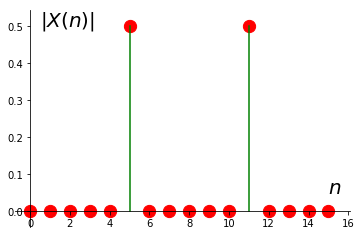

In [6]:
ax = plt.axes()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate('$n$', xy=(15,0.05),size=20)
plt.annotate('$|X(n)|$', xy=(0.5,0.5),size=20)
for x,y in zip(range(len(Y)),Y):
    plt.plot([x,x],[0,y], color = 'green')
    plt.scatter([x],[y],s=150,color='red')
#plt.scatter([11],[1/2],s=150,color='black')
#plt.plot(range(16), Y, 'ro')

Как видим, результат тот же.

# Задача № 3

$X(n) = \sum\limits_{k= 0}^{11}x(k)e^{-j\dfrac{2\pi}{N}k n}$

N = 12

x(k) - действ последовательность

X(0) = 10

$X(1) = -5-4j$


$X(2) = 3 - 2j$


$X(3) = 1 +3j$

$X(4) = 2 + 5j$

$X(5) = 6 - 2j$

$X(6) =12$

Найти

$x(0) - ?$ 

$x(6) - ?$ 

$\sum\limits_{k= 0}^{11}x(k) - ?$

$\sum\limits_{k= 0}^{11}e^{j\dfrac{2\pi}{3}k}x(k) - ? $

$\sum\limits_{k= 0}^{11}|x(k)|^2 - ?$

$X(n) = \sum\limits_{k= 0}^{N-1}x(k)e^{-j\dfrac{2\pi}{N}nk}
\leftrightarrow
x(k) = \dfrac{1}{N}\sum\limits_{n= 0}^{N-1}X(n)e^{j\dfrac{2\pi}{N}n k}$


т.к x(k) - действ последовательность, то 

$X(n) = X^*(N-n)$

Значит 

$X(7) = 6+ 2j = X^*(5)$

$X(8) =  2- 5j =X^*(4)$

$X(9) = 1 - 3j = X^*(3)$

$X(10) = 3 + 2j = X^*(2)$

$X(11) = -5 + 4j = X^*(1)$


Заметим

$x(0) = \dfrac{1}{N}\sum\limits_{n= 0}^{N-1}X(n) = \dfrac{1}{12}\sum\limits_{n= 0}^{11}X(n)$

$x(6) =\dfrac{1}{N}\sum\limits_{n= 0}^{N-1}e^{j\dfrac{2\pi}{N}6n}X(n) =  \dfrac{1}{12}\sum\limits_{n= 0}^{11}e^{j\pi n}X(n)
= \dfrac{1}{12}\sum\limits_{n= 0}^{11}(-1)^nX(n)$

$X(0) = \sum\limits_{n= 0}^{N-1}x(k) =\sum\limits_{n= 0}^{11}x(k)$

$X(4) = \sum\limits_{n= 0}^{N-1}e^{-j\dfrac{2\pi}{N}4 k}x(k) = \sum\limits_{n= 0}^{11}e^{-j\dfrac{2\pi}{3}k}x(k) $

Равенство парсеваля

$\sum\limits_{n= 0}^{N-1}|X(n)|^2 = N \sum\limits_{n = 0}^{N-1}|x(k)|^2$

тогда

$\sum\limits_{n = 0}^{N-1}|x(k)|^2 = \dfrac{1}{12} \sum\limits_{n = 0}^{N-1}|X(n)|^2$


Ответ

$x(0) = 3$ 

$x(6) = \dfrac{7}{3}$ 

$\sum\limits_{k= 0}^{11}x(k) = 10$

$\sum\limits_{k= 0}^{11}e^{j\dfrac{2\pi}{3}k}x(k) = 2 - 5j  = X^*(4) = X(8)$

$\sum\limits_{k= 0}^{11}|x(k)|^2 = 42,5$

 Проверим Решение

In [7]:
X = [10,-5 -4j,3-2j,1+3j,2 +5j,6-2j,12,6+2j,2-5j,1-3j,3+2j,-5+4j]

In [8]:
x = np.fft.ifft(X)

In [9]:
print(x)

[ 3.        +0.j -2.10405928+0.j  2.63237144+0.j  1.16666667+0.j
  0.77831216+0.j  1.93739261+0.j  2.33333333+0.j  1.07136721+0.j
  2.22168784+0.j -1.83333333+0.j  0.03429523+0.j -1.23803387+0.j]


$\sum\limits_{k= 0}^{11}x(k) = 10$

In [10]:
sum1 = 0
for xi in x:
    sum1 = sum1 + xi
print(sum1)

(9.999999999999998+0j)


$\sum\limits_{k= 0}^{11}e^{j\dfrac{2\pi}{3}k}x(k) = 2 - 5j $

In [11]:
sum2 = 0
for i in range(0,12):
    sum2 = sum2 + x[i]* np.exp(1.j*2*np.pi/3*i)
print(sum2)

(1.9999999999999951-4.999999999999994j)


$\sum\limits_{k= 0}^{11}|x(k)|^2 = 42,5$

In [12]:
sum3 = 0
for i in range(0,12):
    sum3 = sum3 + x[i]*np.conj(x[i])
print(sum3)

(42.49999999999999+0j)
